In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import itertools
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC

In [3]:
# Load the CSV file
# The CSV file is in the same directory as your Python script
dataset_dir_name = r"C:\Users\Baryan\Desktop\dataset"

# Get the current directory of the Python script
current_directory = os.getcwd()
# Construct the full path to the CSV file
DATADIR = os.path.join(current_directory, dataset_dir_name)

# List directories in DATADIR
CATEGORIES = [d for d in os.listdir(DATADIR) if os.path.isdir(os.path.join(DATADIR, d))]
print(CATEGORIES)
IMG_SIZE = 100

['african_elephant', 'baboon', 'camel', 'horse', 'koala', 'opossum', 'sea_lion', 'sugar_glider', 'vicuna', 'yak']


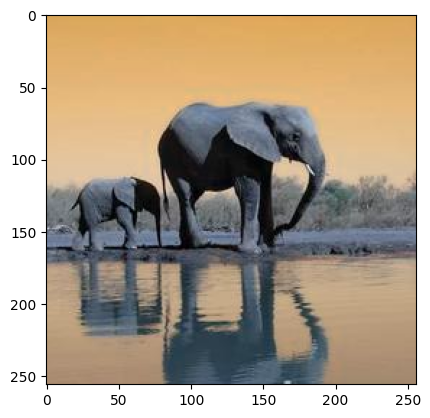

In [4]:
for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img))
        plt.imshow(img_array)
        plt.show()
        break
    break

In [5]:
training_data = []


def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass


create_training_data()

In [6]:
print(len(training_data))

2938


In [7]:
lenofimage = len(training_data)

In [8]:
X = []
y = []

for image_array, label in training_data:
    X.append(image_array)
    y.append(label)
X = np.array(X).reshape(lenofimage, -1)

In [9]:
X.shape

(2938, 30000)

**flattening the array**

In [10]:
X[1]

array([40, 62, 98, ..., 12, 33, 65], dtype=uint8)

max-scaling


In [11]:
X = X / 255.0

Ex. of flattened array...

In [12]:
X[1]

array([0.15686275, 0.24313725, 0.38431373, ..., 0.04705882, 0.12941176,
       0.25490196])

note : y should be in array form compulsory.


In [13]:
y = np.array(y)

In [14]:
y.shape

(2938,)

Now we are ready with our dependent and independent features, now its time for data modelling

applying train_test_split on our data

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

**fitting our data in SVM model**

In [16]:
svc = SVC(kernel="linear", gamma="auto")
svc.fit(X_train, y_train)

**predicting the X_test**

In [ ]:
y_pred = svc.predict(X_test)

Evaluation 

In [ ]:
print("Accuracy on unknown data is", accuracy_score(y_test, y_pred))

Accuracy on unknown data is 0.272108843537415


In [ ]:
print("Accuracy on unknown data is", classification_report(y_test, y_pred))

Accuracy on unknown data is               precision    recall  f1-score   support

           0       0.22      0.29      0.25        68
           1       0.22      0.26      0.24        68
           2       0.40      0.46      0.43        52
           3       0.21      0.16      0.18        67
           4       0.34      0.42      0.38        50
           5       0.26      0.21      0.23        71
           6       0.30      0.30      0.30        60
           7       0.29      0.22      0.25        64
           8       0.25      0.19      0.21        43
           9       0.27      0.24      0.26        45

    accuracy                           0.27       588
   macro avg       0.28      0.28      0.27       588
weighted avg       0.27      0.27      0.27       588



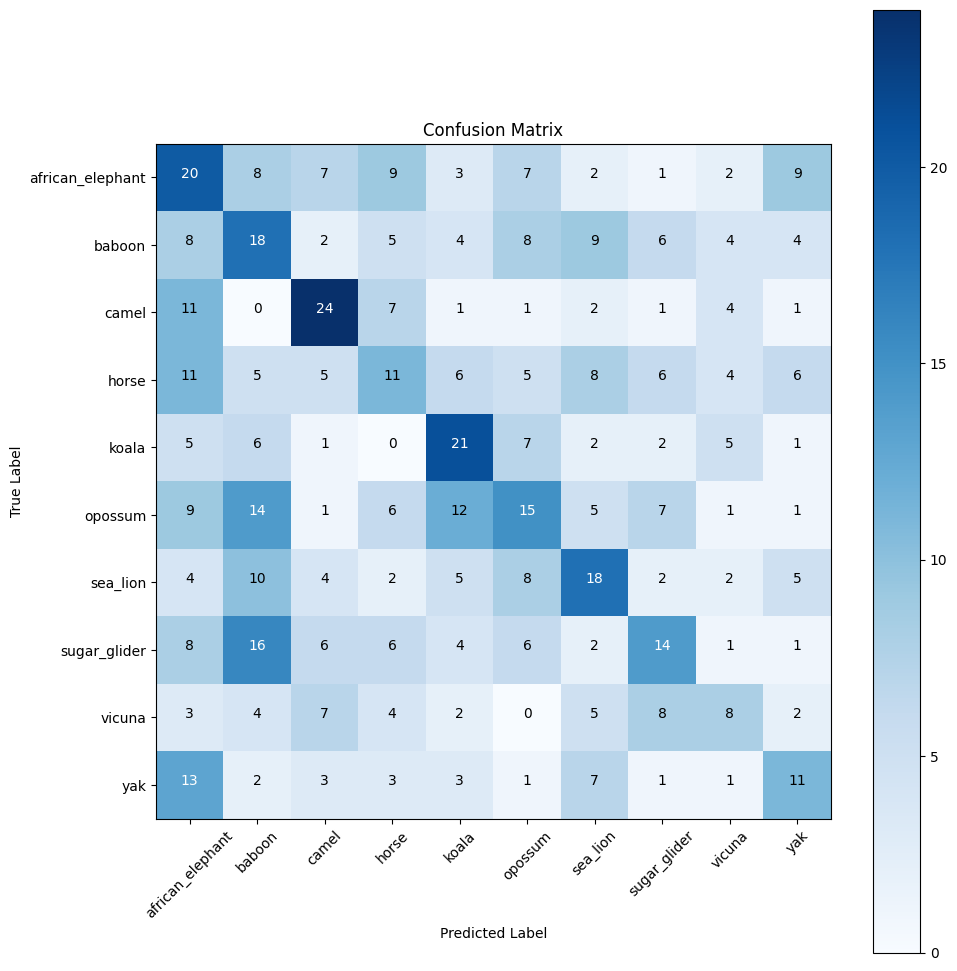

In [ ]:
classes = CATEGORIES

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 10))
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)


thresh = cm.max() / 2.0
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(
        j,
        i,
        cm[i, j],
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black",
    )

plt.tight_layout()
plt.ylabel("True Label")
plt.xlabel("Predicted Label")

plt.show()

using extracted **features** instead of image array for the model

In [ ]:
# Load the CSV file
# The CSV file is in the same directory as your Python script
csv_file_name = "../features/haralick_features.csv"

# Get the current directory of the Python script
current_directory = os.getcwd()
# Construct the full path to the CSV file
csv_file_path = os.path.join(current_directory, csv_file_name)

# Read the CSV file into a DataFrame
data = pd.read_csv(csv_file_path, index_col=0)
# Assuming 'classlabel' is the column containing the class labels
X = data.drop("classlabel", axis=1)  # Extract features by dropping the label column
y = data["classlabel"]  # Extract labels
print(X.head())
# Convert the data to numpy arrays
X = X.to_numpy()
y = y.to_numpy()

   haralick_1  haralick_2  haralick_3   haralick_4  haralick_5  haralick_6  \
0    0.002428  222.585912    0.947941  2137.135593    0.444445  261.574069   
1    0.000301  435.141796    0.894704  2066.598204    0.140828  157.452525   
2    0.000236  644.605509    0.872428  2526.592667    0.132950  240.707834   
3    0.000145  468.903820    0.904321  2450.295808    0.106789  174.321092   
4    0.000259  339.169305    0.946084  3145.700418    0.181900  189.061151   

     haralick_7  haralick_8  haralick_9  haralick_10  haralick_11  \
0   8325.956462    8.066720   11.083405     0.000667     3.818080   
1   7831.251019    8.201341   12.934858     0.000166     5.105606   
2   9461.765161    8.450350   13.382888     0.000135     5.421029   
3   9332.279413    8.452185   13.417720     0.000138     5.300816   
4  12243.632365    8.609554   12.697156     0.000254     4.465429   

   haralick_12  haralick_13  
0    -0.450997     0.999033  
1    -0.215022     0.976219  
2    -0.212577     0.97834

Now we are ready with our dependent and independent features, now its time for data modelling

applying train_test_split on our data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

NameError: name 'train_test_split' is not defined

**fitting our data in SVM model**

In [ ]:
svc = SVC(kernel="linear", gamma="auto", verbose=1)
svc.fit(X_train, y_train)

[LibSVM]

**predicting the X_test**

In [ ]:
y_pred = svc.predict(X_test)

Evaluation 

In [ ]:
print("Accuracy on unknown data is", accuracy_score(y_test, y_pred))

In [ ]:
print("Accuracy on unknown data is", classification_report(y_test, y_pred))

In [ ]:
classes = CATEGORIES

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 10))
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)


thresh = cm.max() / 2.0
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(
        j,
        i,
        cm[i, j],
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black",
    )

plt.tight_layout()
plt.ylabel("True Label")
plt.xlabel("Predicted Label")

plt.show()

using grid search


In [ ]:
from sklearn import svm
from sklearn.model_selection import (
    GridSearchCV,
)  # Defining the parameters grid for GridSearchCV

param_grid = {
    "C": [0.1, 1, 10, 100],
    "gamma": [0.0001, 0.001, 0.1, 1],
    "kernel": ["rbf", "poly"],
}

# Creating a support vector classifier
svc = svm.SVC(probability=True)

# Creating a model using GridSearchCV with the parameters grid
svc = GridSearchCV(svc, param_grid)

In [ ]:
svc.fit(X_train, y_train)

**predicting the X_test**

In [ ]:
y_pred = svc.predict(X_test)

Evaluation 

In [ ]:
print("Accuracy on unknown data is", accuracy_score(y_test, y_pred))

In [ ]:
print("Accuracy on unknown data is", classification_report(y_test, y_pred))

In [ ]:
classes = CATEGORIES

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 10))
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)


thresh = cm.max() / 2.0
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(
        j,
        i,
        cm[i, j],
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black",
    )

plt.tight_layout()
plt.ylabel("True Label")
plt.xlabel("Predicted Label")

plt.show()